In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('archive.zip')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
X = df.iloc[:,:-1]
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


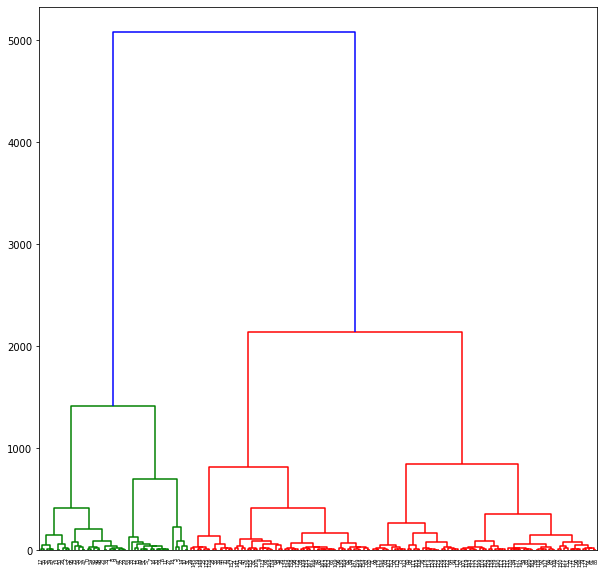

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

#выбрал 4 кластеров, потому что это оптимально между: не слишком маленькое расстояние и не слишком большое
#соответсвенно и высота будет 1000

In [ ]:
Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([160.        , 165.        ,   2.61070872,   2.        ])

In [ ]:
from scipy.cluster.hierarchy import fcluster

label = fcluster(Z, 1000, criterion='distance')

np.unique(label)

array([1, 2, 3, 4], dtype=int32)

In [ ]:
label

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 4, 3, 4, 3, 4, 4, 3,
       4, 4, 3, 3, 3, 4, 4, 1, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3,
       3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 4], dtype=int32)

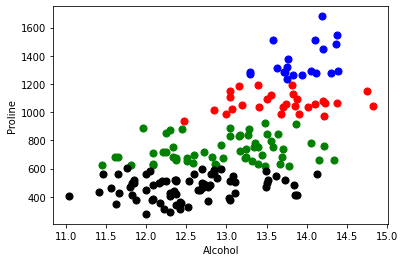

In [ ]:
plt.scatter(df.loc[label==1, 'Alcohol'], df.loc[label==1, 'Proline'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Alcohol'], df.loc[label==2, 'Proline'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Alcohol'], df.loc[label==3, 'Proline'], s=50, marker='o', color='green')
plt.scatter(df.loc[label==4, 'Alcohol'], df.loc[label==4, 'Proline'], s=50, marker='o', color='black')
plt.xlabel('Alcohol')
plt.ylabel('Proline')


plt.show()

Sklern

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
X['pred_sklearn'] = y_hc
y_hc

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

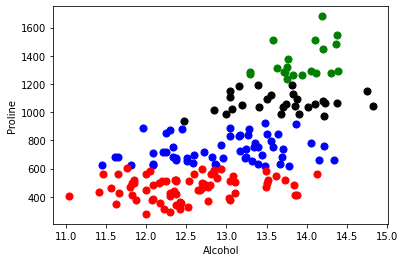

In [ ]:
plt.scatter(X.loc[label==1, 'Alcohol'], X.loc[label==1, 'Proline'], s=50, marker='o', color='black')
plt.scatter(X.loc[label==2, 'Alcohol'], X.loc[label==2, 'Proline'], s=50, marker='o', color='green')
plt.scatter(X.loc[label==3, 'Alcohol'], X.loc[label==3, 'Proline'], s=50, marker='o', color='blue')
plt.scatter(X.loc[label==4, 'Alcohol'], X.loc[label==4, 'Proline'], s=50, marker='o', color='red')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.show()